In [ ]:
!pip install transformers  datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.7 MB/s eta 0:00:00


In [1]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

In [2]:
news_df = pd.read_csv('cleaned_main_df.csv')

In [3]:
news_df

Unnamed: 0  Unnamed: 0.1                      Company  \
0             0             0              Coutts  Company   
1             1             1              Coutts  Company   
2             2             2              Coutts  Company   
3             3             3  The Body Shop International   
4             4             4  The Body Shop International   
..          ...           ...                          ...   
448         194           194  The Body Shop International   
449         195           195  The Body Shop International   
450         196           196         Guardian Media Group   
451         197           197         Guardian Media Group   
452         198           198         Guardian Media Group   

                                                 Title  \
0                      Coutts CEO Peter Flavel Resigns   
1                 Coutts chief Peter Flavel steps down   
2    Coutts-Trotter permanently takes on NSW treasu...   
3    The Body Shop Celebrates Canada's Ban on Cosme...   
4                    Natura & Co to Sell The Body Shop   
..                                                 ...   
448  Bath & Body Works Invites You to Listen to the...   
449           Bath & Body Works Declares Cash Dividend   
450  Guardian says cyber attack exposed identity an...   
451  Tory-linked firm involved in ‘secret’ Africa c...   
452  Guardian editor reveals investigations and ‘le...   

                                     UUID                 Published At  \
0    04f0a771-62f3-422c-b53f-a40b0fa56670  2023-07-27T13:11:22.000000Z   
1    0334ed7f-4c8c-4ecf-a361-91392b9cf168  2023-07-27T13:24:29.000000Z   
2    3a3bf900-7850-4968-89fc-1f97bbd41fd4  2023-05-22T00:26:41.000000Z   
3    35b6a48d-5521-4194-b360-b61fe2d6f069  2023-06-30T16:30:22.000000Z   
4    4352226d-3096-4434-8e93-18a59fdd024d  2023-11-14T13:15:51.000000Z   
..                                    ...                          ...   
448  22e42c75-8687-4187-b355-501f8846e6d8  2022-08-09T20:15:00.000000Z   
449  bf23b5ce-cb01-465f-af99-7ab454bace33  2022-08-05T11:39:00.000000Z   
450  fd2b9c99-7909-4d84-aae7-1eba75830e8f  2023-01-11T18:01:38.000000Z   
451  e2575127-82fa-40aa-b8e0-d538091c2981  2022-11-03T18:30:02.000000Z   
452  d565fb83-b291-4ed1-a8a2-9b55cdd0a6cb  2023-05-15T07:02:05.000000Z   

                       Categories  Relevance Score  \
0         ['politics', 'general']        32.443060   
1         ['general', 'business']        31.877266   
2                    ['politics']        31.383171   
3               ['entertainment']        45.267220   
4               ['entertainment']        45.224884   
..                            ...              ...   
448                  ['business']        31.913530   
449                  ['business']        30.993841   
450       ['general', 'business']        29.575153   
451       ['general', 'politics']        29.516636   
452  ['entertainment', 'general']        29.446003   

                                           Description  
0    Coutts chief executive Peter Flavel has resign...  
1    Exit from upmarket lender ‘by mutual consent’ ...  
2    Michael Coutts-Trotter, former secretary of NS...  
3    The Body Shop, Cruelty Free International, and...  
4    International private equity group Aurelius wi...  
..                                                 ...  
448  COLUMBUS, Ohio, Aug.  09, 2022  (GLOBE NEWSWIR...  
449  COLUMBUS, Ohio, Aug.  05, 2022  (GLOBE NEWSWIR...  
450  Media group alerts employees to breach followi...  
451  Tory-linked lobbying firm CT Group allegedly c...  
452  Guardian editor-in-chief Katharine Viner has r...  

[453 rows x 9 columns]

In [4]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [5]:
sentences = ["there is a shortage of capital, and we need extra financing",  ]
results = nlp("there is a shortage of capital, and we need extra financing")
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative

[{'label': 'Negative', 'score': 0.9966173768043518}]


In [6]:
results = []
def predict(sent):
  try:
    result = nlp(sent)
    return result
  except:
    return 'NAN'


In [7]:
news_df['predicted_description_sentiment'] = news_df['Description'].apply(lambda x: predict(x))

In [8]:
news_df

Unnamed: 0  Unnamed: 0.1                      Company  \
0             0             0              Coutts  Company   
1             1             1              Coutts  Company   
2             2             2              Coutts  Company   
3             3             3  The Body Shop International   
4             4             4  The Body Shop International   
..          ...           ...                          ...   
448         194           194  The Body Shop International   
449         195           195  The Body Shop International   
450         196           196         Guardian Media Group   
451         197           197         Guardian Media Group   
452         198           198         Guardian Media Group   

                                                 Title  \
0                      Coutts CEO Peter Flavel Resigns   
1                 Coutts chief Peter Flavel steps down   
2    Coutts-Trotter permanently takes on NSW treasu...   
3    The Body Shop Celebrates Canada's Ban on Cosme...   
4                    Natura & Co to Sell The Body Shop   
..                                                 ...   
448  Bath & Body Works Invites You to Listen to the...   
449           Bath & Body Works Declares Cash Dividend   
450  Guardian says cyber attack exposed identity an...   
451  Tory-linked firm involved in ‘secret’ Africa c...   
452  Guardian editor reveals investigations and ‘le...   

                                     UUID                 Published At  \
0    04f0a771-62f3-422c-b53f-a40b0fa56670  2023-07-27T13:11:22.000000Z   
1    0334ed7f-4c8c-4ecf-a361-91392b9cf168  2023-07-27T13:24:29.000000Z   
2    3a3bf900-7850-4968-89fc-1f97bbd41fd4  2023-05-22T00:26:41.000000Z   
3    35b6a48d-5521-4194-b360-b61fe2d6f069  2023-06-30T16:30:22.000000Z   
4    4352226d-3096-4434-8e93-18a59fdd024d  2023-11-14T13:15:51.000000Z   
..                                    ...                          ...   
448  22e42c75-8687-4187-b355-501f8846e6d8  2022-08-09T20:15:00.000000Z   
449  bf23b5ce-cb01-465f-af99-7ab454bace33  2022-08-05T11:39:00.000000Z   
450  fd2b9c99-7909-4d84-aae7-1eba75830e8f  2023-01-11T18:01:38.000000Z   
451  e2575127-82fa-40aa-b8e0-d538091c2981  2022-11-03T18:30:02.000000Z   
452  d565fb83-b291-4ed1-a8a2-9b55cdd0a6cb  2023-05-15T07:02:05.000000Z   

                       Categories  Relevance Score  \
0         ['politics', 'general']        32.443060   
1         ['general', 'business']        31.877266   
2                    ['politics']        31.383171   
3               ['entertainment']        45.267220   
4               ['entertainment']        45.224884   
..                            ...              ...   
448                  ['business']        31.913530   
449                  ['business']        30.993841   
450       ['general', 'business']        29.575153   
451       ['general', 'politics']        29.516636   
452  ['entertainment', 'general']        29.446003   

                                           Description  \
0    Coutts chief executive Peter Flavel has resign...   
1    Exit from upmarket lender ‘by mutual consent’ ...   
2    Michael Coutts-Trotter, former secretary of NS...   
3    The Body Shop, Cruelty Free International, and...   
4    International private equity group Aurelius wi...   
..                                                 ...   
448  COLUMBUS, Ohio, Aug.  09, 2022  (GLOBE NEWSWIR...   
449  COLUMBUS, Ohio, Aug.  05, 2022  (GLOBE NEWSWIR...   
450  Media group alerts employees to breach followi...   
451  Tory-linked lobbying firm CT Group allegedly c...   
452  Guardian editor-in-chief Katharine Viner has r...   

                       predicted_description_sentiment  
0    [{'label': 'Neutral', 'score': 0.9903330206871...  
1    [{'label': 'Neutral', 'score': 0.9727116823196...  
2    [{'label': 'Neutral', 'score': 0.9999278783798...  
3    [{'label': 'Neutral', 'score': 0.9989994168281...  
4    [{'label': 'Neutral', 'score': 0.99340

In [ ]:
news_df.to_csv('finbert_sentiment_result_v2.csv')

In [10]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline


# Load FinBERT model
model_name = 'yiyanghkust/finbert-tone'  # Example FinBERT model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Function to analyze sentiment
def analyze_sentiment(text):
    # Check if text is a string and not empty
    if isinstance(text, str) and text.strip():
        # Truncate text to the first 512 tokens for compatibility with BERT models
        tokens = tokenizer.tokenize(text)[:512]
        text = tokenizer.convert_tokens_to_string(tokens)
        result = nlp(text)[0]
        return result['label']
    else:
        return 'Neutral'

news_df['sentiment'] = news_df['Description'].apply(analyze_sentiment)

# Counting the number of positive, negative, and neutral articles for each company
sentiment_counts = news_df.groupby('Company')['sentiment'].value_counts().unstack(fill_value=0)

print(sentiment_counts)


sentiment                             Negative  Neutral  Positive
Company                                                          
Abel  Cole                                   0       11         1
Adam Smith International                     1       10         1
All Market Europe Ltd                        0        3         9
Bates Wells                                  0       11         1
Bennetts Associates                          0        5         2
Bighams                                      0        1         0
Blue Zoo Productions Ltd                     0        1         1
BrewDog                                      2       12         1
Bridges Fund Management                      2        9         1
Bruichladdich Distillery Co. Ltd             0        5         0
Cook Trading Ltd                             1       11         0
Coutts  Company                              5       13         0
Divine Chocolate Ltd                         1        4         1
EQ Investo

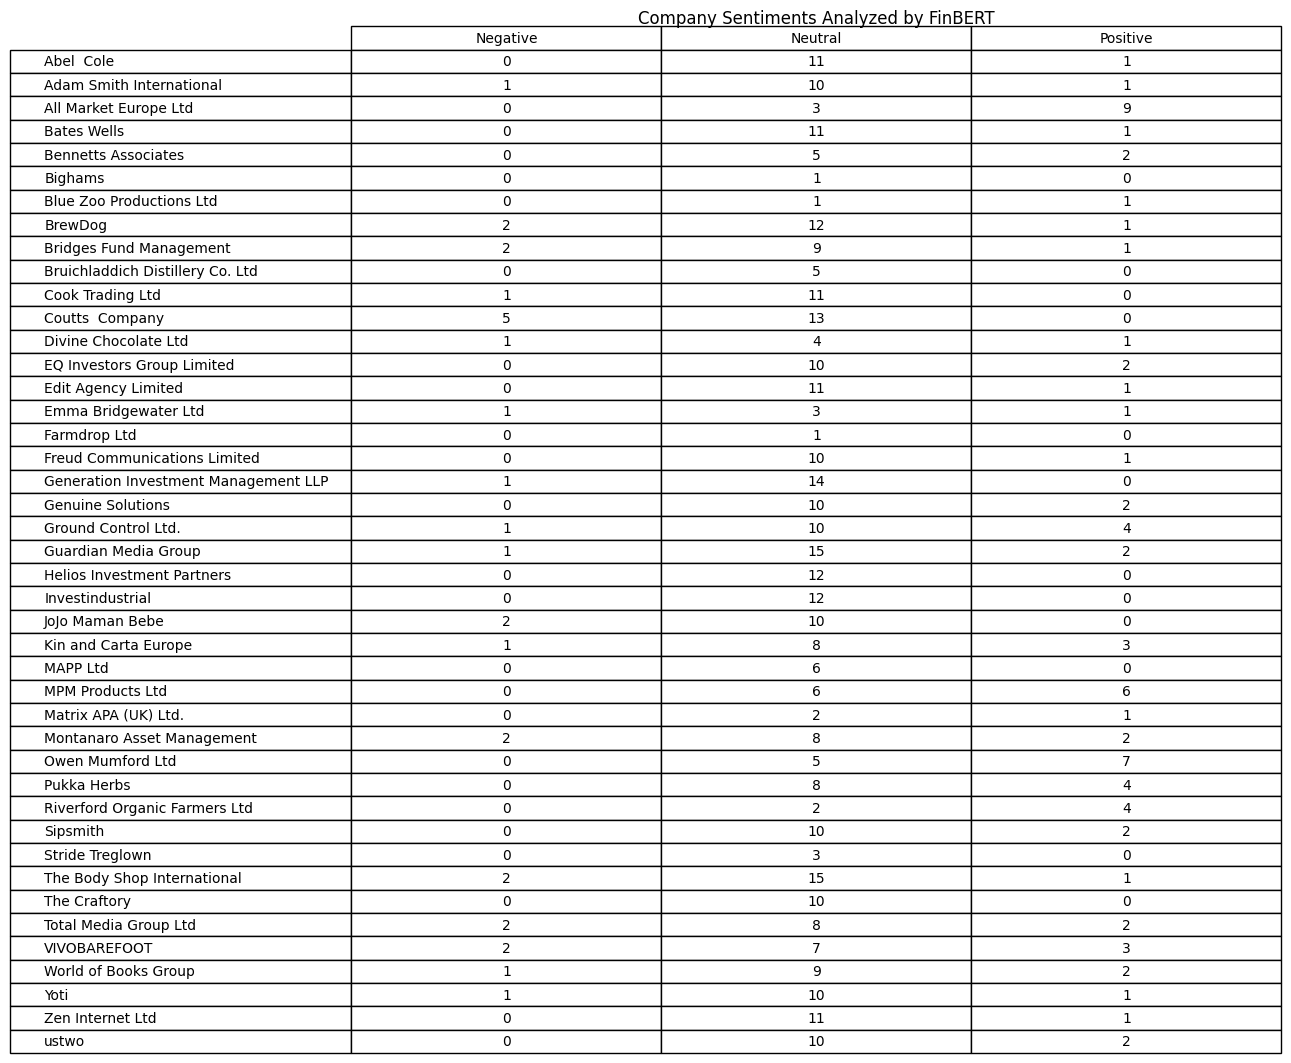

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


summary = news_df.groupby(['Company', 'sentiment']).size().unstack(fill_value=0)

# Plotting the table
plt.figure(figsize=(12, 6))
# Creating a table plot
table = plt.table(cellText=summary.values, colLabels=summary.columns, rowLabels=summary.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)

plt.axis('off')
plt.title('Company Sentiments Analyzed by FinBERT', y=1.6)
plt.show()
